# UTS Machine Learning

**Anggota Kelompok 2:** \
2105551068 - Ni Made Deni Sikiandani \
2105551122 - Mananda Davar Sinaga \
2105551126 - I Nyoman Yodya Mahesa Sastra


## Import Library
Pada tahap ini kita import library-library yang diperlukan oleh program

In [1]:
# Digunakan untuk membaca dan memanipulasi data
import pandas as pd
# Digunakan untuk memanipulasi array
import numpy as np
# Digunakan untuk memvisualisasikan data
import matplotlib.pyplot as plt
# Digunakan untuk visualisasi data
import seaborn as sns

In [2]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

## Load Data
Pada tahap ini kita load dataset yang telah didownload dari Kaggle

In [3]:
dataset_train = pd.read_csv('dataset/train.csv')
dataset_test = pd.read_csv('dataset/test.csv')
df_train = dataset_train.copy()
df_test = dataset_test.copy()

## Detail Data
Pada tahap ini kita melihat terlebih dahulu detail-detail pada dataset

In [4]:
# Melihat detail dataset df_train
df_train

,id,umur,indeks_masa_badan,jenis_makanan,penyakit_khusus,penyakit_keturunan,lokasi_tinggal,mengatur_pola_makan,olahraga,jam_tidur_teratur,merokok,minum_alkohol,mengkonsumsi_suplemen,memperhatikan_kesehatan_mental,bersosialisasi,jumlah_sakit_setahun_terakhir,sehat
0,13777,51,29.45,jenis4,41,tidak ada,perkotaan,ya,tidak,ya,ya,tidak,tidak,tidak,tidak,2.0,tidak
1,17804,18,22.22,jenis2 jenis5,36,tidak ada,pedesaan,ya,tidak,tidak,tidak,tidak,tidak,tidak,ya,2.0,ya
2,2476,55,23.43,jenis3 jenis5,12,tidak ada,perkotaan,ya,ya,ya,tidak,ya,tidak,tidak,tidak,4.0,ya
3,18360,30,21.88,jenis3,40,tidak ada,perkotaan,ya,tidak,tidak,tidak,tidak,tidak,tidak,tidak,1.0,ya
4,17530,35,17.25,jenis6,33,tidak ada,pedesaan,ya,tidak,tidak,ya,tidak,ya,tidak,ya,3.0,tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19944,4821,26,21.37,jenis6,43,tidak ada,perkotaan,ya,tidak,tidak,tidak,tidak,tidak,tidak,tidak,1.0,ya
19945,21429,35,22.05,jenis5,28,tidak ada,perkotaan,ya,tidak,tidak,ya,tidak,tidak,tidak,ya,2.0,tidak
19946,18601,22,21.44,jenis6,49,tidak ada,pedesaan,ya,ya,tidak,ya,tidak,tidak,tidak,tidak,2.0,ya
19947,2067,13,21.66,jenis2 jenis3,12,tidak ada,pedesaan,ya,tidak,tidak,ya,tidak,tidak,tidak,tidak,1.0,ya


In [5]:
# Melihat detail dataset df_test
df_test

,id,umur,indeks_masa_badan,jenis_makanan,penyakit_khusus,penyakit_keturunan,lokasi_tinggal,mengatur_pola_makan,olahraga,jam_tidur_teratur,merokok,minum_alkohol,mengkonsumsi_suplemen,memperhatikan_kesehatan_mental,bersosialisasi,jumlah_sakit_setahun_terakhir
0,6774,5,18.03,jenis3 jenis4,26,tidak ada,pedesaan,ya,tidak,tidak,tidak,tidak,tidak,tidak,tidak,1.0
1,8117,34,28.07,jenis6,46,tidak ada,perkotaan,ya,tidak,tidak,ya,tidak,tidak,tidak,tidak,1.0
2,24780,52,23.71,jenis4,34,tidak ada,perkotaan,ya,tidak,tidak,ya,tidak,tidak,tidak,tidak,1.0
3,8532,16,22.93,jenis2,26,tidak ada,pedesaan,ya,ya,tidak,ya,tidak,tidak,tidak,ya,3.0
4,9139,3,29.44,jenis3,31,tidak ada,perkotaan,ya,tidak,tidak,tidak,tidak,tidak,tidak,tidak,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,9040,60,18.57,jenis6,15,tidak ada,pedesaan,tidak,ya,tidak,ya,tidak,tidak,tidak,tidak,1.0
4984,19022,64,29.18,jenis1,35,tidak ada,pedesaan,ya,tidak,ya,tidak,tidak,tidak,tidak,tidak,2.0
4985,2981,46,24.02,jenis2,25,tidak ada,perkotaan,ya,tidak,tidak,tidak,tidak,ya,tidak,ya,3.0
4986,15814,38,29.51,jenis3,11,tidak ada,pedesaan,ya,tidak,tidak,ya,tidak,tidak,tidak,tidak,1.0


In [6]:
df_train.columns

Index(['id', 'umur', 'indeks_masa_badan', 'jenis_makanan', 'penyakit_khusus',
       'penyakit_keturunan', 'lokasi_tinggal', 'mengatur_pola_makan',
       'olahraga', 'jam_tidur_teratur', 'merokok', 'minum_alkohol',
       'mengkonsumsi_suplemen', 'memperhatikan_kesehatan_mental',
       'bersosialisasi', 'jumlah_sakit_setahun_terakhir', 'sehat'],
      dtype='object')

In [7]:
df_train.shape

(19949, 17)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19949 entries, 0 to 19948
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19949 non-null  int64  
 1   umur                            19949 non-null  int64  
 2   indeks_masa_badan               19949 non-null  float64
 3   jenis_makanan                   19949 non-null  object 
 4   penyakit_khusus                 19949 non-null  int64  
 5   penyakit_keturunan              19949 non-null  object 
 6   lokasi_tinggal                  19949 non-null  object 
 7   mengatur_pola_makan             19949 non-null  object 
 8   olahraga                        19949 non-null  object 
 9   jam_tidur_teratur               19949 non-null  object 
 10  merokok                         19949 non-null  object 
 11  minum_alkohol                   19949 non-null  object 
 12  mengkonsumsi_suplemen           

In [9]:
df_train.describe()

,id,umur,indeks_masa_badan,penyakit_khusus,jumlah_sakit_setahun_terakhir
count,19949.000000,19949.000000,19949.000000,19949.000000,19949.000000
mean,12453.449697,33.234047,23.466072,26.512557,1.757482
std,7203.749026,19.394246,3.767784,15.069903,0.770115
min,1.000000,0.000000,17.000000,1.000000,1.000000
25%,6219.000000,17.000000,20.210000,13.000000,1.000000
50%,12418.000000,33.000000,23.400000,26.000000,2.000000
75%,18706.000000,50.000000,26.760000,40.000000,2.000000
max,24936.000000,66.000000,30.000000,52.000000,5.000000


In [10]:
df_train.duplicated().sum()

0

In [11]:
df_train.isnull().sum()

id                                0
umur                              0
indeks_masa_badan                 0
jenis_makanan                     0
penyakit_khusus                   0
penyakit_keturunan                0
lokasi_tinggal                    0
mengatur_pola_makan               0
olahraga                          0
jam_tidur_teratur                 0
merokok                           0
minum_alkohol                     0
mengkonsumsi_suplemen             0
memperhatikan_kesehatan_mental    0
bersosialisasi                    0
jumlah_sakit_setahun_terakhir     0
sehat                             0
dtype: int64

In [12]:
df_train['umur'].value_counts()

umur
64    376
31    363
28    347
19    340
38    335
     ... 
10    260
27    260
66    260
20    258
45    257
Name: count, Length: 67, dtype: int64

In [13]:
df_train['umur'].nunique()

67

Ada umur yang bernilai 0

In [14]:
df_train.query('umur == 0')

,id,umur,indeks_masa_badan,jenis_makanan,penyakit_khusus,penyakit_keturunan,lokasi_tinggal,mengatur_pola_makan,olahraga,jam_tidur_teratur,merokok,minum_alkohol,mengkonsumsi_suplemen,memperhatikan_kesehatan_mental,bersosialisasi,jumlah_sakit_setahun_terakhir,sehat
28,9949,0,28.60,jenis6,45,tidak ada,pedesaan,ya,tidak,tidak,tidak,tidak,tidak,tidak,tidak,1.0,tidak
45,1720,0,23.05,jenis1,7,tidak ada,pedesaan,ya,ya,tidak,tidak,ya,tidak,tidak,tidak,3.0,ya
51,21634,0,28.24,jenis6,49,tidak ada,pedesaan,ya,tidak,tidak,tidak,tidak,tidak,tidak,ya,2.0,tidak
128,7234,0,21.44,jenis1 jenis5,16,tidak ada,pedesaan,ya,tidak,tidak,tidak,tidak,tidak,tidak,ya,2.0,ya
152,12664,0,20.00,jenis5,52,tidak ada,pedesaan,ya,tidak,tidak,tidak,tidak,tidak,tidak,tidak,1.0,ya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19797,10507,0,28.19,jenis2,3,tidak ada,perkotaan,ya,ya,tidak,tidak,tidak,tidak,tidak,tidak,2.0,tidak
19804,14724,0,28.24,jenis6,18,tidak ada,pedesaan,ya,tidak,tidak,tidak,tidak,tidak,tidak,ya,2.0,tidak
19866,18197,0,28.68,jenis2,16,tidak ada,pedesaan,ya,tidak,tidak,tidak,tidak,tidak,tidak,tidak,1.0,tidak
19914,21643,0,23.65,jenis6,7,tidak ada,pedesaan,ya,tidak,tidak,tidak,tidak,tidak,tidak,tidak,1.0,ya


In [15]:
df_train['indeks_masa_badan'].value_counts()

indeks_masa_badan
20.21    40
17.23    38
19.28    37
19.05    36
24.23    35
         ..
26.24     2
28.06     2
19.57     1
18.49     1
29.36     1
Name: count, Length: 1301, dtype: int64

In [16]:
df_train['indeks_masa_badan'].nunique()

1301

In [17]:
df_train['jenis_makanan'].value_counts()

jenis_makanan
jenis6                                 7395
jenis5                                 1696
jenis2                                 1630
jenis4                                 1625
jenis3                                 1612
jenis1                                 1607
jenis2 jenis4                           370
jenis1 jenis2                           369
jenis4 jenis5                           363
jenis1 jenis5                           354
jenis2 jenis5                           346
jenis1 jenis3                           344
jenis3 jenis4                           344
jenis2 jenis3                           342
jenis1 jenis4                           341
jenis3 jenis5                           338
jenis1 jenis2 jenis5                     90
jenis1 jenis2 jenis3                     88
jenis1 jenis3 jenis4                     87
jenis2 jenis3 jenis5                     80
jenis1 jenis3 jenis5                     79
jenis1 jenis2 jenis4                     78
jenis3 jenis4 jeni

In [18]:
df_train['penyakit_khusus'].value_counts()

penyakit_khusus
49    434
17    419
1     419
19    416
36    410
48    409
40    407
6     404
12    400
8     399
25    399
11    398
41    396
24    396
30    395
5     392
23    391
7     391
29    391
43    389
39    388
34    387
52    387
4     386
44    386
20    383
22    381
42    381
50    380
51    379
18    379
46    379
31    378
33    378
3     377
35    375
21    374
27    373
28    372
45    370
10    369
9     368
47    365
32    365
16    364
13    363
2     363
15    356
26    354
38    348
37    344
14    342
Name: count, dtype: int64

In [19]:
df_train['penyakit_keturunan'].value_counts()

penyakit_keturunan
tidak ada    19949
Name: count, dtype: int64

In [20]:
df_train['lokasi_tinggal'].value_counts()

lokasi_tinggal
pedesaan     13882
perkotaan     6067
Name: count, dtype: int64

In [21]:
df_train['mengatur_pola_makan'].value_counts()

mengatur_pola_makan
ya       17910
tidak     2039
Name: count, dtype: int64

In [22]:
df_train['olahraga'].value_counts()

olahraga
tidak    17193
ya        2756
Name: count, dtype: int64

In [23]:
df_train['jam_tidur_teratur'].value_counts()

jam_tidur_teratur
tidak    16216
ya        3733
Name: count, dtype: int64

In [24]:
df_train['merokok'].value_counts()

merokok
tidak    11442
ya        8507
Name: count, dtype: int64

In [25]:
df_train['minum_alkohol'].value_counts()

minum_alkohol
tidak    18225
ya        1724
Name: count, dtype: int64

In [26]:
df_train['mengkonsumsi_suplemen'].value_counts()

mengkonsumsi_suplemen
tidak    18906
ya        1043
Name: count, dtype: int64

In [27]:
df_train['memperhatikan_kesehatan_mental'].value_counts()

memperhatikan_kesehatan_mental
tidak    19949
Name: count, dtype: int64

In [28]:
df_train['bersosialisasi'].value_counts()

bersosialisasi
tidak    12055
ya        7894
Name: count, dtype: int64

In [29]:
df_train['jumlah_sakit_setahun_terakhir'].value_counts()

jumlah_sakit_setahun_terakhir
1.0    8476
2.0    8253
3.0    2829
4.0     364
5.0      27
Name: count, dtype: int64

In [30]:
df_train['sehat'].value_counts()

sehat
ya       12435
tidak     7514
Name: count, dtype: int64

## Variabel Pada Dataset
Variabel Numerical:  
1. umur
2. indeks_masa_badan
3. penyakit_khusus
4. jumlah_sakit_setahun_terakhir

Variabel Categorical:
1. jenis_makanan
2. penyakit_keturunan
3. lokasi_tinggal
4. mengatur_pola_makan
5. olahraga
6. jam_tidur_teratur
7. merokok
8. minum_alkohol
9. mengkonsumsi_suplemen
10. memperhatikan_kesehatan_mental
11. bersosialisasi
13. sehat

## Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

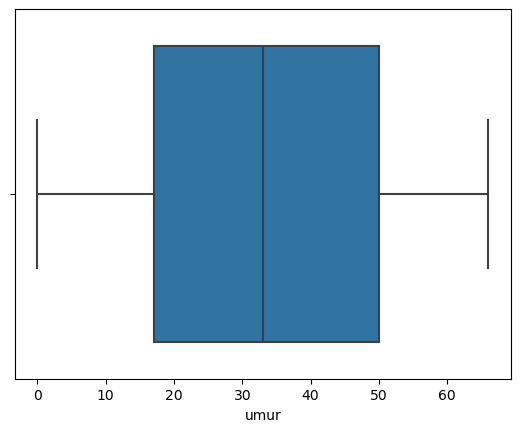

In [31]:
sns.boxplot(data=df_train, x='umur')
plt.show

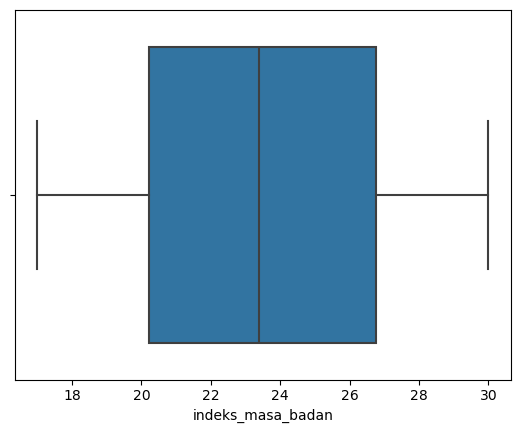

In [32]:
sns.boxplot(data=df_train, x='indeks_masa_badan')
plt.show()

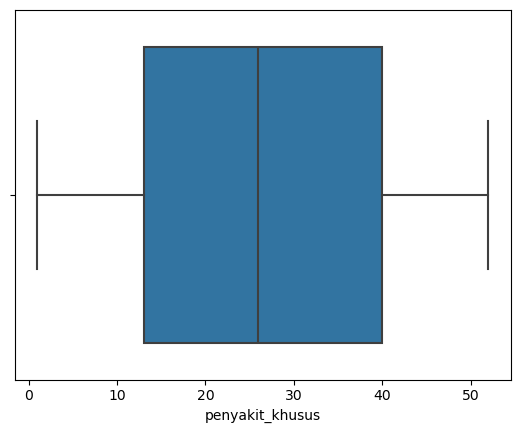

In [33]:
sns.boxplot(data=df_train, x='penyakit_khusus')
plt.show()

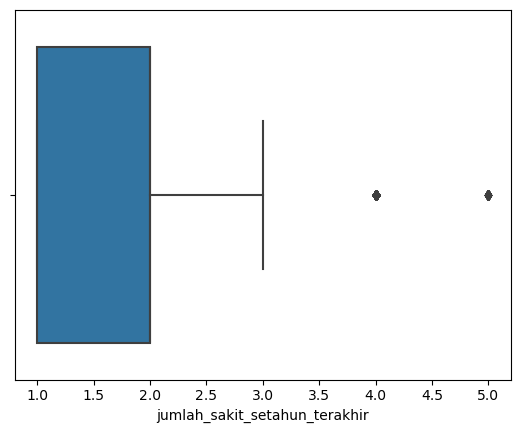

In [34]:
sns.boxplot(data=df_train, x='jumlah_sakit_setahun_terakhir')
plt.show()

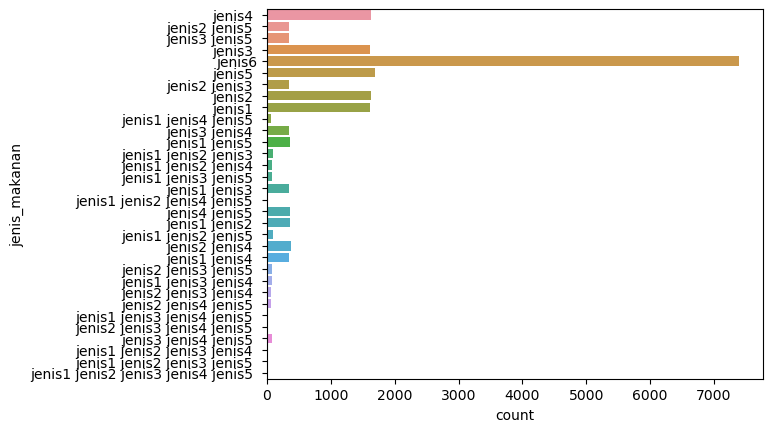

In [35]:
sns.countplot(data=df_train, y='jenis_makanan')
plt.show()

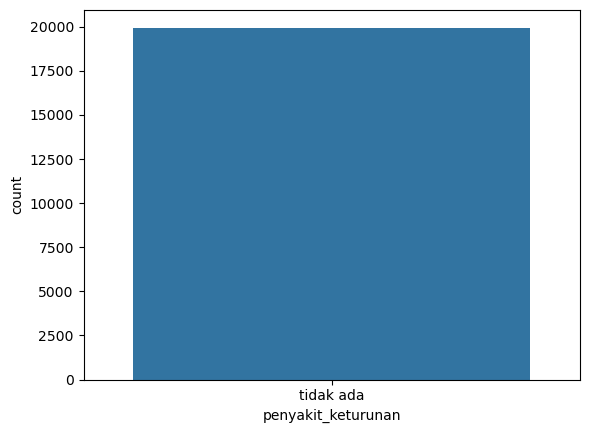

In [36]:
sns.countplot(data=df_train, x='penyakit_keturunan')
plt.show()

In [37]:
# mapping tidak dan tidak ada 0
map_0 ={
    'tidak': 0,
    'tidak ada': 0
}

df_train['penyakit_keturunan'] = df_train['penyakit_keturunan'].replace(map_0)
df_test['penyakit_keturunan'] = df_test['penyakit_keturunan'].replace(map_0)

In [38]:
df_train['penyakit_keturunan'].value_counts()

penyakit_keturunan
0    19949
Name: count, dtype: int64

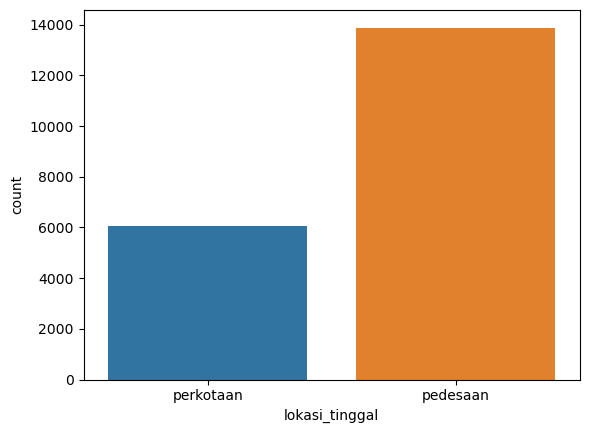

In [39]:
sns.countplot(data=df_train, x='lokasi_tinggal')
plt.show()

In [40]:
# Inisialisasi labelEncoder() untuk encode value dari lokasi tinggal agar menjadi numeric
label_encoder = LabelEncoder()

# Menerapkan transformasi pada kolom 'lokasi_tnggal'
df_train['lokasi_tinggal'] = label_encoder.fit_transform(df_train['lokasi_tinggal'])

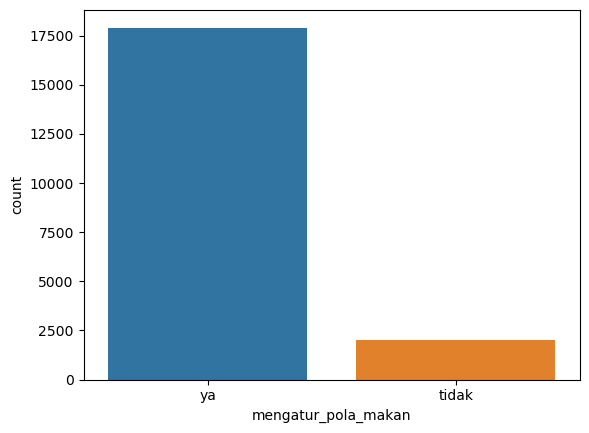

In [41]:
sns.countplot(data=df_train, x='mengatur_pola_makan')
plt.show()

In [42]:
# mapping ya menjadi nilai 1 dan tidak menjadi 0
map_binary ={
    'ya': 1,
    'tidak': 0
}

df_train['mengatur_pola_makan'] = df_train['mengatur_pola_makan'].replace(map_binary)
df_test['mengatur_pola_makan'] = df_test['mengatur_pola_makan'].replace(map_binary)

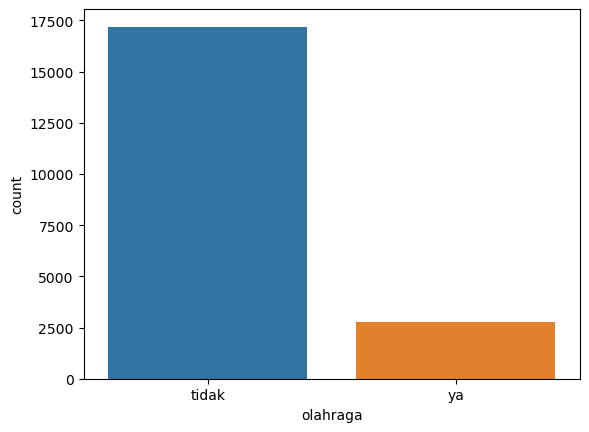

In [43]:
sns.countplot(data=df_train, x='olahraga')
plt.show()

In [44]:
df_train['olahraga'] = df_train['olahraga'].replace(map_binary)
df_test['olahraga'] = df_test['olahraga'].replace(map_binary)

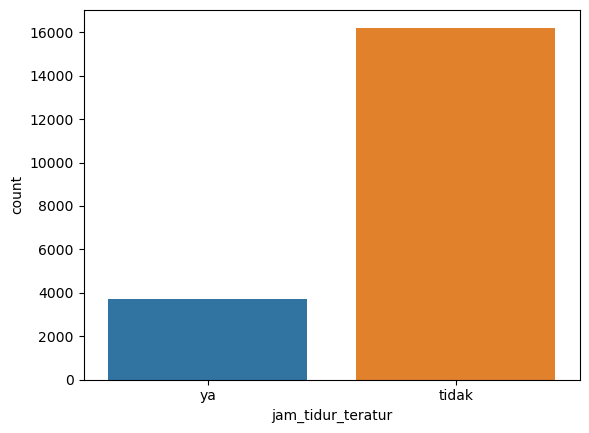

In [45]:
sns.countplot(data=df_train, x='jam_tidur_teratur')
plt.show()

In [46]:
df_train['jam_tidur_teratur'] = df_train['jam_tidur_teratur'].replace(map_binary)
df_test['jam_tidur_teratur'] = df_test['jam_tidur_teratur'].replace(map_binary)

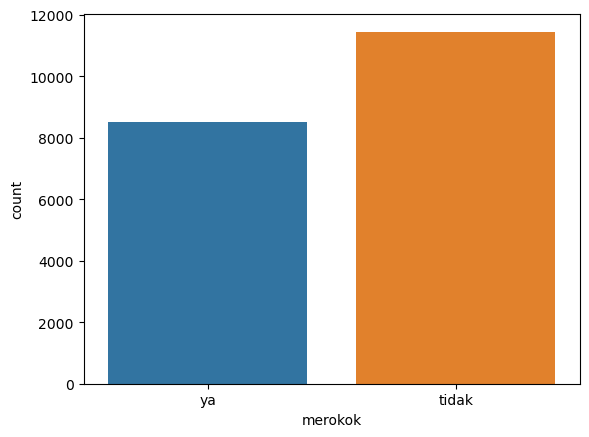

In [47]:
sns.countplot(data=df_train, x='merokok')
plt.show()

In [48]:
df_train['merokok'] = df_train['merokok'].replace(map_binary)
df_test['merokok'] = df_test['merokok'].replace(map_binary)

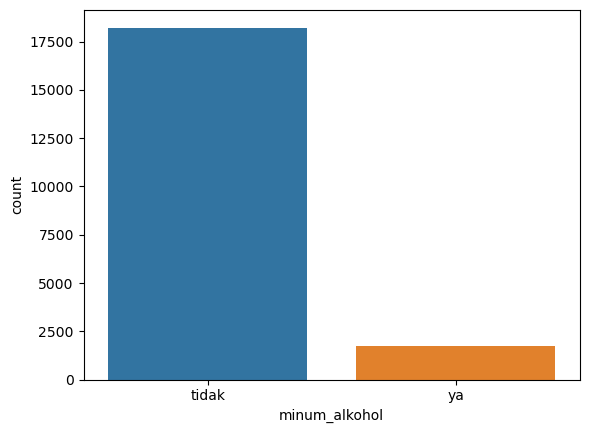

In [49]:
sns.countplot(data=df_train, x='minum_alkohol')
plt.show()

In [50]:
df_train['minum_alkohol'] = df_train['minum_alkohol'].replace(map_binary)
df_test['minum_alkohol'] = df_test['minum_alkohol'].replace(map_binary)

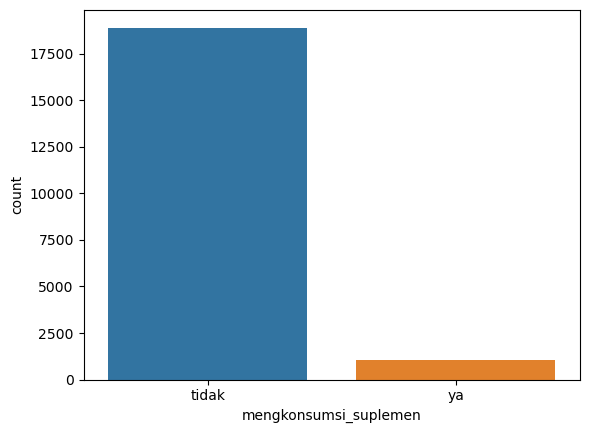

In [51]:
sns.countplot(data=df_train, x='mengkonsumsi_suplemen')
plt.show()

In [52]:
df_train['mengkonsumsi_suplemen'] = df_train['mengkonsumsi_suplemen'].replace(map_binary)
df_test['mengkonsumsi_suplemen'] = df_test['mengkonsumsi_suplemen'].replace(map_binary)

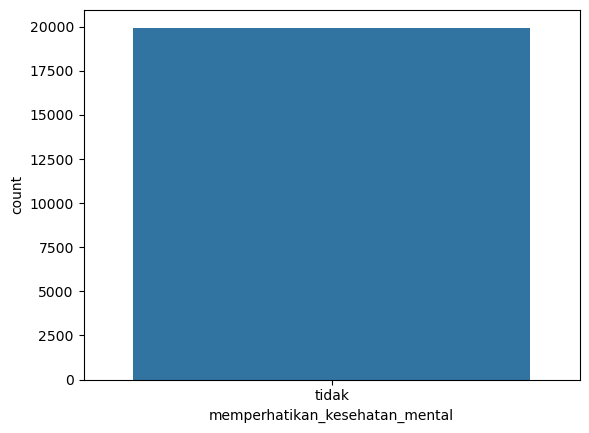

In [53]:
sns.countplot(data=df_train, x='memperhatikan_kesehatan_mental')
plt.show()

In [54]:
# mapping tidak dan tidak ada 0
map_0 ={
    'tidak': 0,
    'tidak ada': 0
}

df_train['memperhatikan_kesehatan_mental'] = df_train['memperhatikan_kesehatan_mental'].replace(map_0)
df_test['memperhatikan_kesehatan_mental'] = df_test['memperhatikan_kesehatan_mental'].replace(map_0)

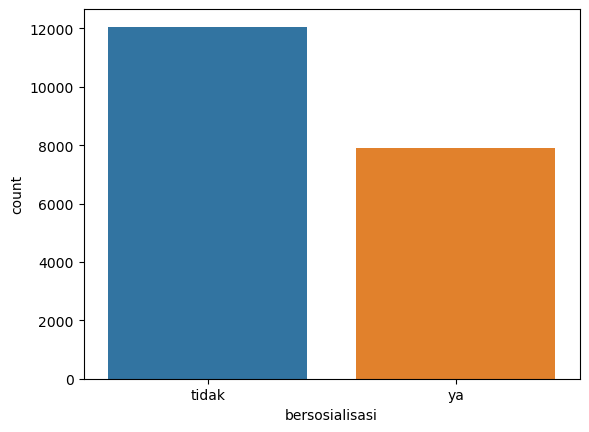

In [55]:
sns.countplot(data=df_train, x='bersosialisasi')
plt.show()

In [56]:
df_train['bersosialisasi'] = df_train['bersosialisasi'].replace(map_binary)
df_test['bersosialisasi'] = df_test['bersosialisasi'].replace(map_binary)

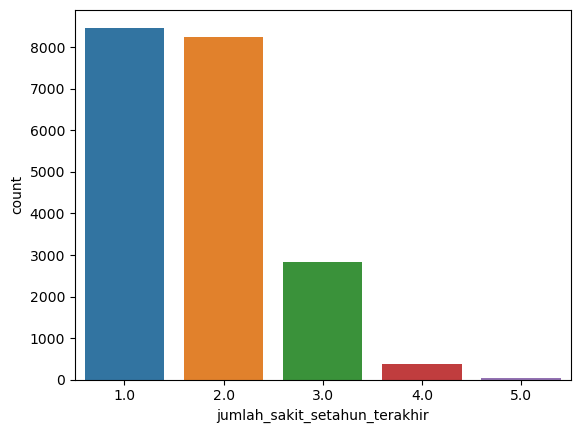

In [57]:
sns.countplot(data=df_train, x='jumlah_sakit_setahun_terakhir')
plt.show()

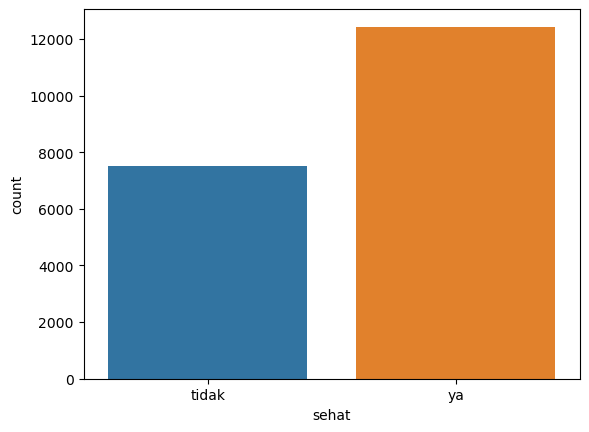

In [58]:
sns.countplot(data=df_train, x='sehat')
plt.show()

In [59]:
df_train['sehat'] = df_train['sehat'].replace(map_binary)

In [60]:
df_train['olahraga'].value_counts()

olahraga
0    17193
1     2756
Name: count, dtype: int64

## Multivariate Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

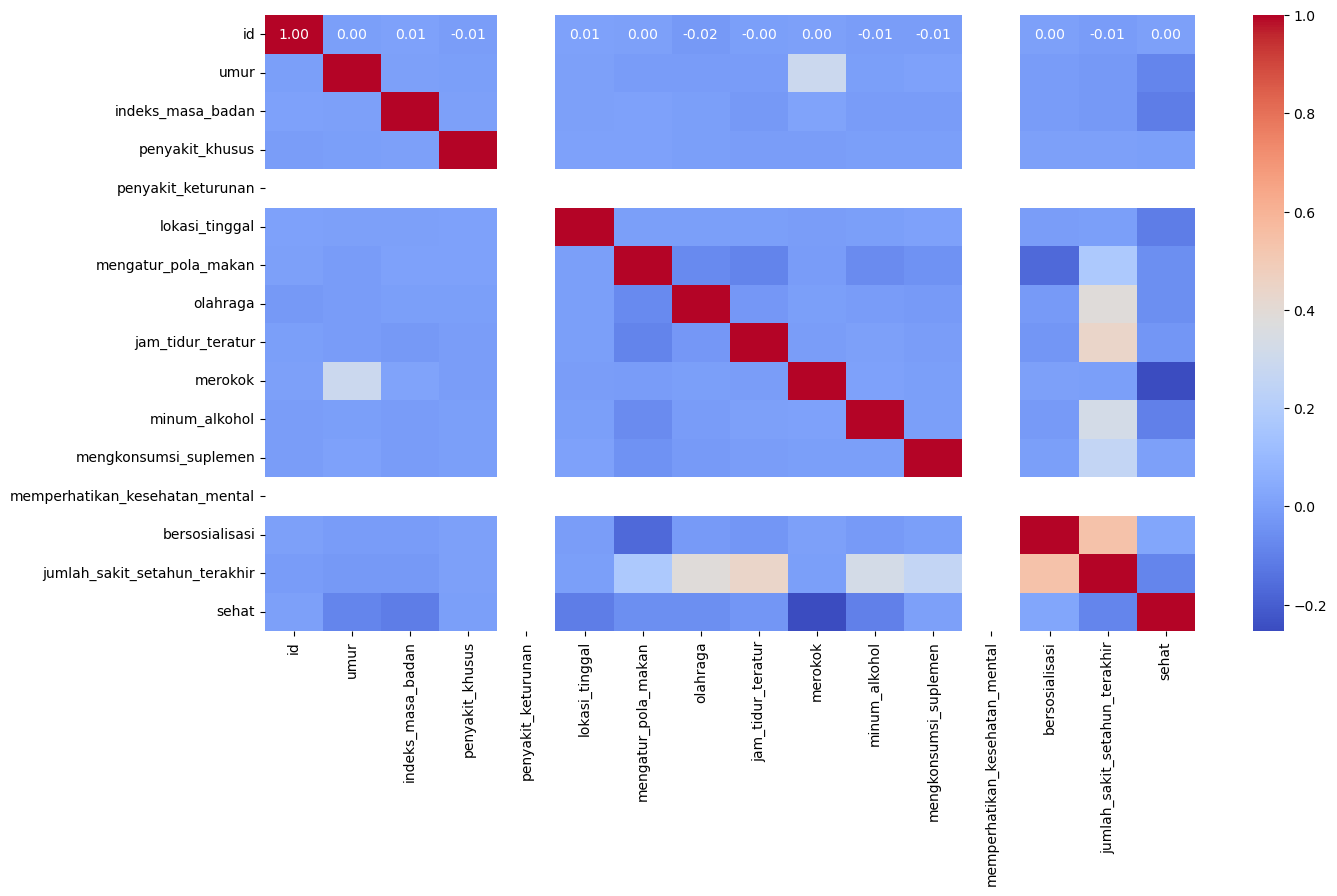

In [61]:
correlation_matrix = df_train.corr(numeric_only=True)
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

Warna putih pada heatmap korelasi menunjukkan bahwa nilai korelasi antara dua variabel adalah sangat rendah atau bahkan mendekati nol. Dalam heatmap korelasi, warna digunakan untuk menunjukkan kekuatan dan arah hubungan antara variabel-variabel.

## Clean Data
Pada tahap ini kita melakukan cleaning pada DataFrame df_train dan juga df_test

In [62]:
# hapus penyakit_keturunan dan memperhatikan_kesehatan_mental di drop karena tidak ada kontribusi appaun terkait variabel dependen karena korelasinya yang sangat kecil
df_train = df_train.drop(['penyakit_keturunan','memperhatikan_kesehatan_mental'], axis=1)
df_test = df_test.drop(['penyakit_keturunan','memperhatikan_kesehatan_mental'], axis=1)

In [63]:
# Split the strings in the 'jenis' column by space and create dummy variables
jenis_dummies1 = df_test['jenis_makanan'].str.get_dummies(sep=' ')
jenis_dummies2 = df_train['jenis_makanan'].str.get_dummies(sep=' ')

# Concatenate the dummy variables with the original DataFrame
df_test = pd.concat([df_test, jenis_dummies1], axis=1)
df_train = pd.concat([df_train, jenis_dummies2], axis=1)

# Drop the original 'jenis' column if needed
df_test = df_test.drop('jenis_makanan', axis=1)
df_train = df_train.drop('jenis_makanan', axis=1)

In [64]:
df_test = pd.get_dummies(df_test)
target = df_train['sehat']
df_train.drop(['sehat'], axis=1, inplace=True)
df_train = pd.get_dummies(df_train)

In [65]:
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)
df_train = df_train.reindex(columns=df_test.columns, fill_value=0)

## Pembuatan Model
Pada tahap ini kita membuat model dari data yang telah kita clean sebelumnya

In [66]:
# Memisahkan fitur dan label
X = df_train.drop(columns=['id'])  # Menghilangkan kolom 'sehat' dan 'id' dari fitur
y = target

# Melakukan one-hot encoding pada fitur-fitur kategorikal (jika diperlukan)
X_encoded = pd.get_dummies(X)  # Gunakan pd.get_dummies() atau OneHotEncoder jika perlu

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [67]:
# Fungsi untuk melatih dan mengevaluasi model
def train_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"Classification Report {name}:")
    print(classification_report(y_test, y_pred))

In [68]:
# Model Prediksi
models_to_train = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in models_to_train.items():
    print(f"\nTraining {name}...")
    train_model(model, name)


Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8295739348370927
Classification Report Gradient Boosting:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      2247
           1       0.85      0.89      0.87      3738

    accuracy                           0.83      5985
   macro avg       0.82      0.81      0.81      5985
weighted avg       0.83      0.83      0.83      5985


Training Random Forest...
Random Forest Accuracy: 0.8101921470342524
Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      2247
           1       0.83      0.87      0.85      3738

    accuracy                           0.81      5985
   macro avg       0.80      0.79      0.79      5985
weighted avg       0.81      0.81      0.81      5985


Training Decision Tree...
Decision Tree Accuracy: 0.7744360902255639
Classification Report Decision Tree:
             

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AdaBoost Accuracy: 0.8071846282372598
Classification Report AdaBoost:
              precision    recall  f1-score   support

           0       0.78      0.68      0.73      2247
           1       0.82      0.88      0.85      3738

    accuracy                           0.81      5985
   macro avg       0.80      0.78      0.79      5985
weighted avg       0.81      0.81      0.80      5985


Training Naive Bayes...
Naive Bayes Accuracy: 0.7060985797827903
Classification Report Naive Bayes:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63      2247
           1       0.78      0.74      0.76      3738

    accuracy                           0.71      5985
   macro avg       0.69      0.70      0.69      5985
weighted avg       0.71      0.71      0.71      5985


Training XGBoost...
XGBoost Accuracy: 0.8334168755221387
Classification Report XGBoost:
              precision    recall  f1-score   support

           0       0.79      0.

## Hasil Akurasi

Gradient Boosting Accuracy:  
0.8295739348370927  

Random Forest Accuracy:  
0.8066833751044278  

Decision Tree Accuracy:  
0.7767752715121136  

SVM Accuracy:  
0.740016708437761  

KNN Accuracy:  
0.712280701754386  

Logistic Regression Accuracy:  
0.724812030075188  

AdaBoost Accuracy:  
0.8073517126148705  

Naive Bayes Accuracy:  
0.7157894736842105  

XGBoost Accuracy:  
0.833249791144528  

CatBoost Accuracy:  
0.8431077694235589  

LightGBM Accuracy:  
0.8402673350041772  

In [69]:
# Gunakan model dengan akurasi tertinggi untuk memprediksi df_test
CatBoost_model = CatBoostClassifier()

CatBoost_model.fit(X_train, y_train)

Learning rate set to 0.031758
0:	learn: 0.6777381	total: 10.3ms	remaining: 10.3s
1:	learn: 0.6642669	total: 21ms	remaining: 10.5s
2:	learn: 0.6496805	total: 31.1ms	remaining: 10.3s
3:	learn: 0.6349520	total: 45ms	remaining: 11.2s
4:	learn: 0.6231786	total: 57.1ms	remaining: 11.4s
5:	learn: 0.6115209	total: 66.5ms	remaining: 11s
6:	learn: 0.6013072	total: 77.3ms	remaining: 11s
7:	learn: 0.5921216	total: 86.9ms	remaining: 10.8s
8:	learn: 0.5830142	total: 96.8ms	remaining: 10.7s
9:	learn: 0.5756587	total: 107ms	remaining: 10.6s
10:	learn: 0.5683064	total: 119ms	remaining: 10.7s
11:	learn: 0.5610786	total: 128ms	remaining: 10.6s
12:	learn: 0.5541762	total: 138ms	remaining: 10.4s
13:	learn: 0.5462533	total: 148ms	remaining: 10.5s
14:	learn: 0.5399224	total: 158ms	remaining: 10.4s
15:	learn: 0.5330890	total: 167ms	remaining: 10.3s
16:	learn: 0.5278775	total: 175ms	remaining: 10.1s
17:	learn: 0.5219208	total: 184ms	remaining: 10s
18:	learn: 0.5166327	total: 193ms	remaining: 9.95s
19:	learn: 0

In [70]:
simpanid = df_test['id']
df_test.drop('id', axis=1, inplace=True)

In [71]:
train_pred_df = CatBoost_model.predict(df_test)

In [72]:
df_test['sehat'] = train_pred_df
df_test['id'] = simpanid
df_subset = df_test[['id', 'sehat']]
df_subset['sehat'] = df_subset['sehat'].map({1: 'ya', 0: 'tidak'})
df_subset

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4740\3697335397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['sehat'] = df_subset['sehat'].map({1: 'ya', 0: 'tidak'})


,id,sehat
0,6774,tidak
1,8117,tidak
2,24780,ya
3,8532,ya
4,9139,tidak
...,...,...
4983,9040,tidak
4984,19022,ya
4985,2981,ya
4986,15814,tidak


In [73]:
df_subset.to_csv("hasilml_p5.csv", index=False)

## Pembahasan

beberapa metode telah dilakukan seperti melakukan binning terhadap umur tetapi menghasilkan akurasi yg rendah yaitu sekitar 80 persen. Lalu proses binning juga dilakukan pada tabel indeks_masa_badan sesuai dengan labelnya yaitu underweight, normal, overweight, obesitas, dan obesitas II, namun hasil akurasi hanya mencapai 81 persen. Kemudian menghapus data dengan umur==0 juga telah dilakukan namun tingkat akurasi juga lebih rendah. Model yang menghasilkan akurasi paling tinggi adalah model saat ini 